# Bringing everything together:
- This tutorial is based on `matplotlib` as plotting library. Furthermore, this package `rep_fig_vis` provides some additional functions that wrap around `matplotlib`. 
- This tutorial walks through the process of creating a reproducible, multi-panel figure. The code below creates an example figure, which can be built up in 3 steps by setting `plot_axes`, `plot_content` and `plot_extra` from `False` to `True` iteratively. Read along in the comments in code for detailed explanation of what each function does. 

In [1]:
## use these magic commands to automatically reload modules:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys 
sys.path.append('../scripts/')
import rep_fig_vis as rfv  # package with general-purpose visualisation functions 
import tutorial_rf_functions as tut  # functions written specifically for this tutorial 

### Settings & parameters 
Before we start plotting the figure, we can set figure settings, as well as parameters such as filepaths:

In [14]:
## Set general plotting parameters
rfv.set_fontsize(10)
np.random.seed(2)  # fix seed

## Set parameters
n_cat = 2
n_misc_rows = 2
n_misc = 5
colour_list = ['#101820', '#1b362c', '#2f553d', '#4f7553', '#79936f', '#aeae92']
colours_misc_dict = {xx: colour_list[xx] for xx in range(len(colour_list))}
im_path = 'tutorial_content/drawing-hands.jpg!Large.jpg'

save_fig = False

## For this tutorial, I have made these sequential bools:
plot_axes = True
plot_content = True 
plot_extra = True

Font size is set to 10


../scripts/rep_fig_vis.py:115: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['' for x in ax.get_yticklabels()])


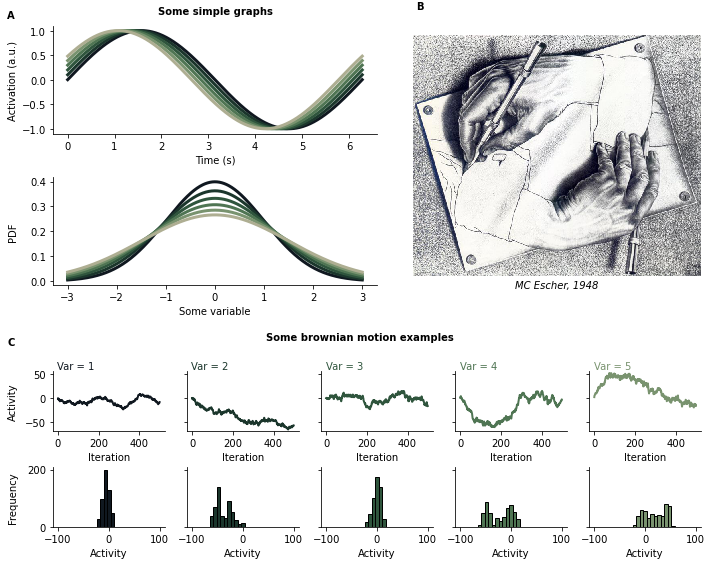

In [15]:
## Make figure:
fig = plt.figure(constrained_layout=False,  # False better when customising grids 
                 figsize=(10, 8))  # width x height in inches

## Make grids:
gs_topleft = fig.add_gridspec(ncols=1, nrows=n_cat,  # number of rows and columns
                              bottom=0.5, top=0.95, right=0.5, left=0.05,  # set bounds on 4 sides (in fraction of fig)
                              wspace=0.2, hspace=0.4)  # width and height spacing between plot in this grid

gs_topright = fig.add_gridspec(ncols=1, nrows=1, 
                               bottom=0.5, top=0.95, right=0.95, left=0.55)  # leave a bit of space between grids (eg left here and right in grid above)

gs_bottom = fig.add_gridspec(ncols=n_misc, nrows=n_misc_rows,  # number of rows and columns
                            bottom=0.08, top=0.35, right=0.95, left=0.05,  # set bounds on 4 sides
                            wspace=0.2, hspace=0.6)  # width and height spacing between plot in this grid 

if plot_axes:
    ## Create axes in top left bit:
    ax_cat = {}
    for ii in range(n_cat):
        ax_cat[ii] = fig.add_subplot(gs_topleft[ii])  # create ax by indexing grid object
        rfv.despine(ax_cat[ii])

    ## Add image ax:
    ax_im = fig.add_subplot(gs_topright[0])
    rfv.naked(ax_im)

    ## Add bottom axes: 
    ax_misc = {ii: {} for ii in range(n_misc_rows)}

    for ii in range(n_misc_rows):  # n rows
        for jj in range(n_misc):
            ax_misc[ii][jj] = fig.add_subplot(gs_bottom[ii, jj])  # 2D indexing because multiple rows & multiple columns
            curr_ax = ax_misc[ii][jj]  # easier to type
            rfv.despine(curr_ax)
            if jj > 0: # not left column
                rfv.remove_yticklabels(curr_ax)

if plot_axes and plot_content:  # Add content to panels:
    ## Top left, let's draw some periodic functions:
    for i_sin in range(6):
        curr_alpha = 1 #- i_sin / 7  # set alpha (or transparency) of plot 
        curr_colour = colours_misc_dict[i_sin]  # fetch colour from dict
        tut.plot_sin_one_period(ax=ax_cat[0], phase=i_sin / 10, 
                                alpha=curr_alpha, colour=curr_colour)  # add sinus plot to top panel
        tut.plot_normal_distr(ax=ax_cat[1], std_distr=1 + 0.1 * i_sin, 
                              alpha=curr_alpha, colour=curr_colour)  # add normal distr plot to bottom panel 

    ## Add image content
    img = mpimg.imread(im_path)  # load image into memroy
    ax_im.imshow(img, interpolation='none')  # generally it's best to disable interpolation (between neighbouring pixels)

    ## Add brownian motion
    for i_misc in range(n_misc):
        curr_var = 1 + i_misc  # increase variance per plot 
        tut.plot_brown_proc(ax_trace=ax_misc[0][i_misc], ax_hist=ax_misc[1][i_misc], 
                            var=curr_var,
                            colour=colours_misc_dict[i_misc], plot_ylabel=(i_misc == 0))
        
        ## Add text for each top panel that denotes variance; use annotate because we can set coordinates relative to axes fraction (with xycoords arg)
        ax_misc[0][i_misc].annotate(f'Var = {curr_var}', xy=(0.04, 1), va='bottom',
                                    xycoords='axes fraction', c=colours_misc_dict[i_misc])
    for i_row in range(n_misc_rows):
        rfv.equal_lims_n_axs(ax_list=list(ax_misc[i_row].values()))  # set lims equal for all columns, for the two rows separately.

    fig.align_ylabels(axs=[ax_cat[0], ax_cat[1], ax_misc[0][0], ax_misc[1][0]])  # align the ylabels across all plots that align on the left side of the fig

if plot_extra:
    ## First way of doing text, by plt.text()
    ax_cat[0].text(s='A', x=-1.29, y=1.25,  # specify coords in data coord system of this ax
                   fontdict={'weight': 'bold'}) 
    ax_cat[0].text(s='C', x=-1.29, y=-5.4,  # specify coords in data coord system of this ax
                   fontdict={'weight': 'bold'})  

    ax_im.text(s='MC Escher, 1948', x=np.mean(list(ax_im.get_xlim())), y=ax_im.get_ylim()[0] + 10,  # get ax limits to define coords
                fontdict={'ha': 'center', 'va': 'top',  # change text alignment to make centering easier
                          'style': 'italic'})               

    ## Alternatively, use annotate to specificy coords in fraction of ax or fig
    ## (this is actually usually also easier to align panel labels)
    ax_im.annotate('B', xy=(0.578, 0.965), xycoords='figure fraction',
                   weight='bold')
    ax_im.annotate('Some brownian motion examples', xy=(0.5, 0.39), xycoords='figure fraction',
                   ha='center', weight='bold')

if save_fig:
    plt.savefig('generated_figures/Example_rep_fig.pdf', bbox_inches='tight')